In [6]:
import cv2 as cv
import glob
import random
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import shutil
import os

In [8]:
for path in glob.glob('/home/chinmay/Documents/Internship/TASK3/train/*.jpg'):
    if not(os.path.exists('/home/chinmay/Documents/Internship/TASK3/train/cat') or os.path.exists('/home/chinmay/Documents/Internship/TASK3/train/dog')):
        os.makedirs('/home/chinmay/Documents/Internship/TASK3/train/cat')
        os.makedirs('/home/chinmay/Documents/Internship/TASK3/train/dog')
        print('Done!')
    
    if 'cat' in path:
        shutil.move(path, '/home/chinmay/Documents/Internship/TASK3/train/cat/' + path.split('/')[-1])
    else:
        shutil.move(path, '/home/chinmay/Documents/Internship/TASK3/train/dog/' + path.split('/')[-1])

In [9]:
my_dataset = {}
for class_name in glob.glob('/home/chinmay/Documents/Internship/TASK3/train/*'):
    my_dataset[class_name.split('/')[-1]] = glob.glob(class_name + '/*')

In [10]:
print(f"These are the keys in my dataset {my_dataset.keys()}")

These are the keys in my dataset dict_keys(['cat', 'dog'])


In [12]:
x = my_dataset.keys()
y = [len(keys) for keys in my_dataset.values()]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"The shape of my data before splitting is {y}")

The shape of my data before splitting is [12500, 12500]


In [14]:
def img_props(file):
    image = cv.imread(file)
    h, w, d = image.shape
    return h, w, d

In [16]:
df = pd.DataFrame(columns=['Height',
                           'Width',
                           'Channels',
                           'Class'])

for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        h,w,d = img_props(path)
        df.loc[len(df)] = [h,w,d,pet_class]

df.head(5)

,Height,Width,Channels,Class
0,375,499,3,cat
1,375,499,3,cat
2,352,400,3,cat
3,500,474,3,cat
4,375,499,3,cat


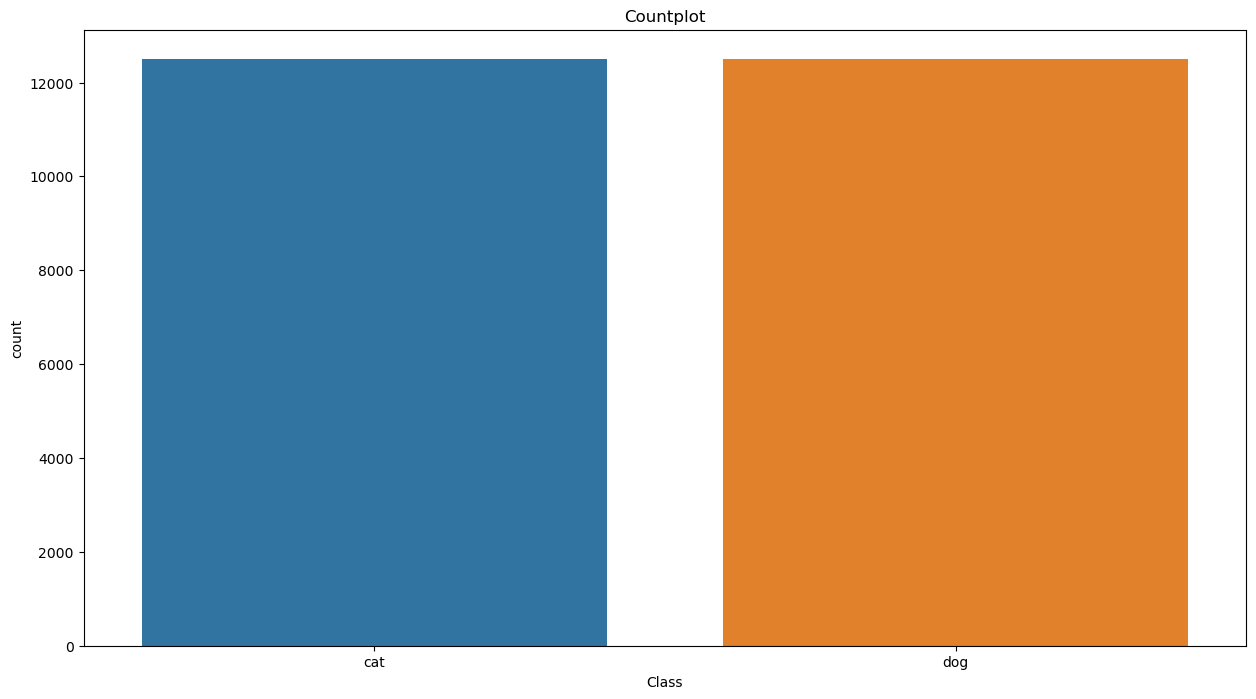

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Class')
plt.title('Countplot')
plt.show()

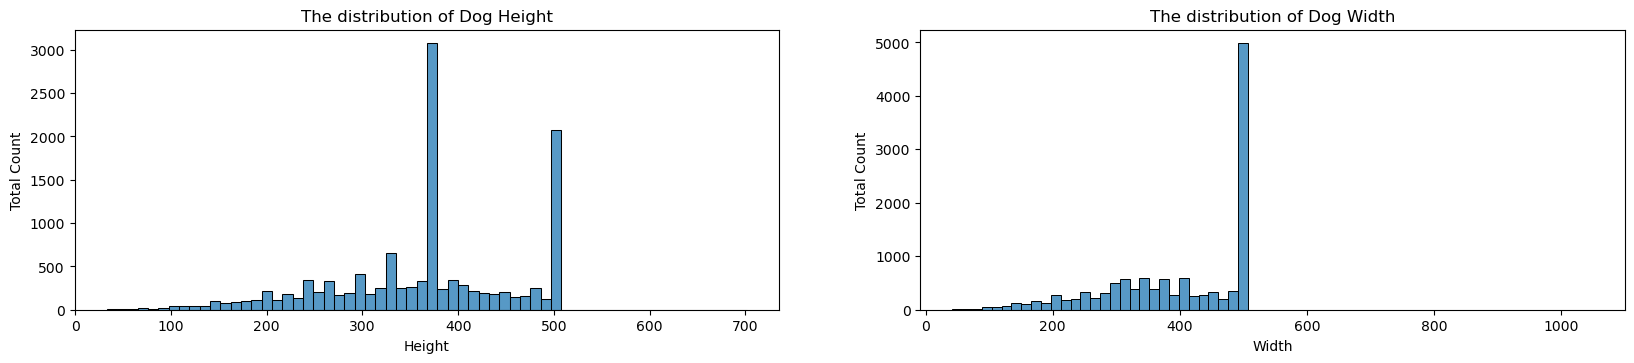

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='dog']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='dog']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Width')
plt.show()

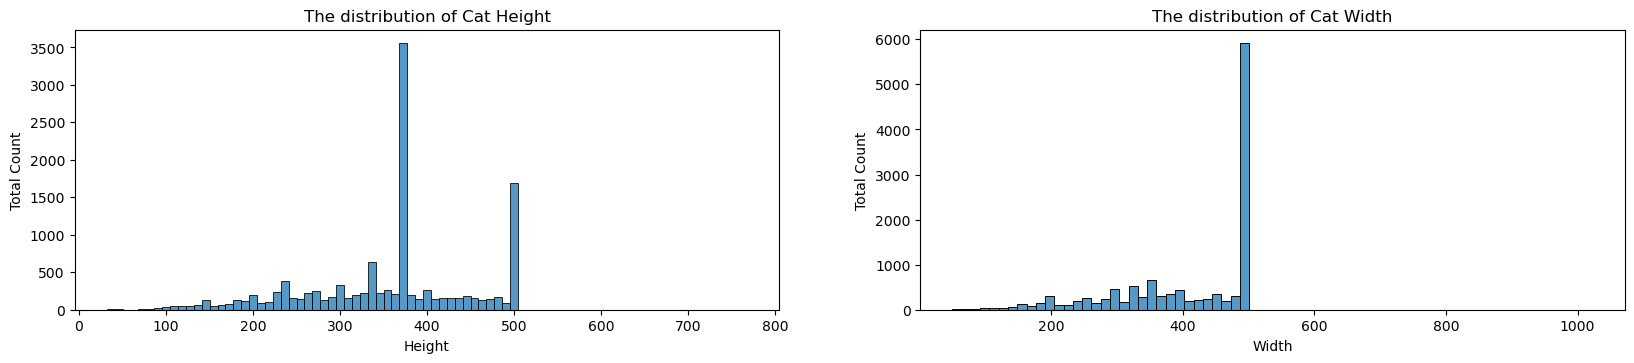

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='cat']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='cat']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Width')
plt.show()

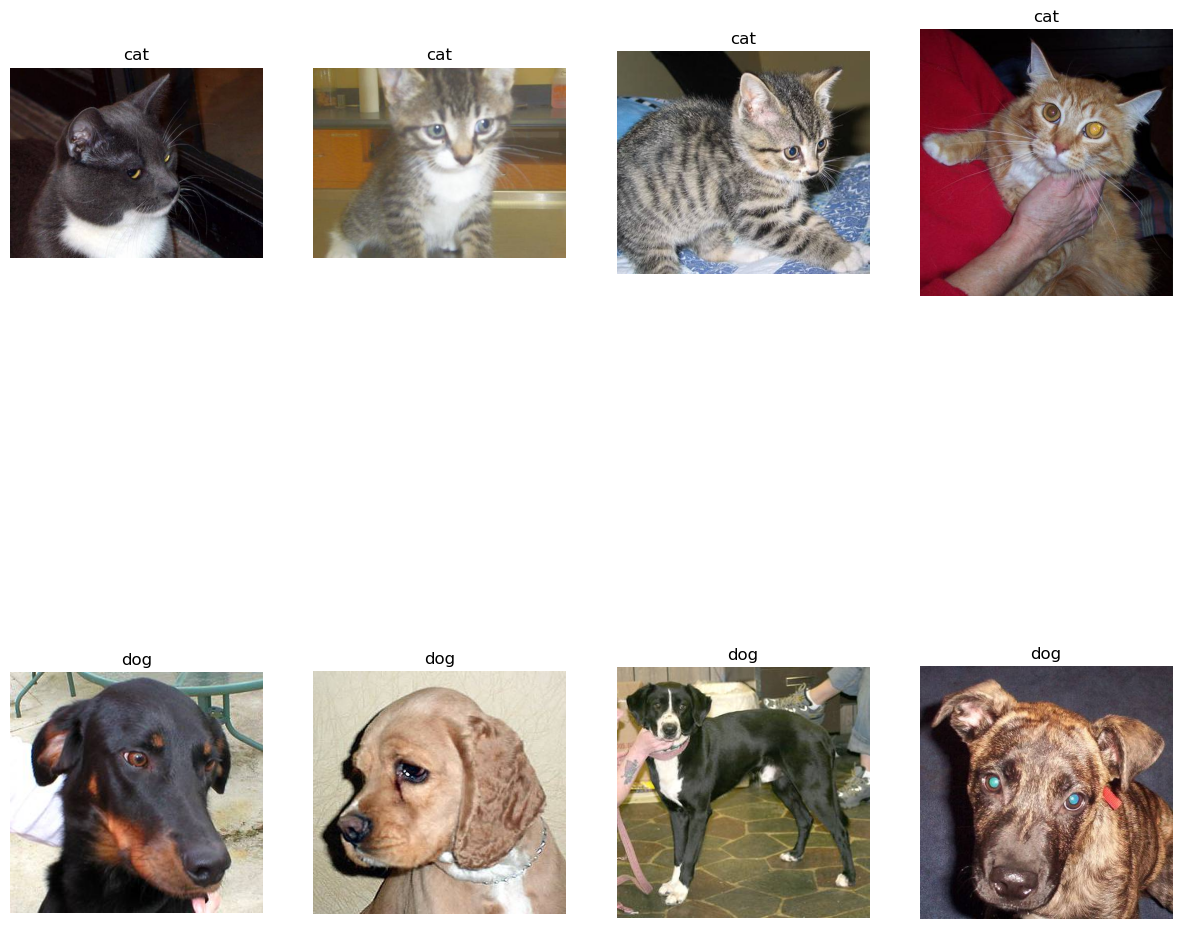

In [23]:
count = 0
plt.figure(figsize=(15,15))
for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        sp = plt.subplot(2, 4, count + 1, )
        sp.axis('Off')
        sp.set_title(pet_class)
        image = cv.imread(path)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image)
        count +=1 
        if count % 4 == 0:
            break

plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['Class'] = lbl_encoder.fit_transform(df['Class'])

In [25]:
df.head()

,Height,Width,Channels,Class
0,375,499,3,0
1,375,499,3,0
2,352,400,3,0
3,500,474,3,0
4,375,499,3,0


In [26]:
df['Class'].value_counts().head()

0    12500
1    12500
Name: Class, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X =  df.drop(['Class'],axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)


In [28]:
X_train.shape, y_train.shape

((20000, 3), (20000,))

In [29]:
X_train = X_train/255  # Reshaping my data so that they range between 0 and 1
X_test = X_test/255

In [30]:
X_train

,Height,Width,Channels
6167,1.466667,1.960784,0.011765
3101,1.458824,1.956863,0.011765
17307,1.945098,1.960784,0.011765
3950,1.956863,1.635294,0.011765
893,1.207843,1.384314,0.011765
...,...,...,...
5695,1.058824,1.047059,0.011765
8006,1.831373,1.956863,0.011765
17745,1.470588,1.956863,0.011765
17931,1.188235,1.960784,0.011765


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.metrics import classification_report, accuracy_score
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_test)

In [36]:
print(f"The Classification Report for SVC model is \n{classification_report(y_test,preds)}")

The Classification Report for SVC model is 
              precision    recall  f1-score   support

           0       0.54      0.63      0.58      2534
           1       0.55      0.46      0.50      2466

    accuracy                           0.55      5000
   macro avg       0.55      0.54      0.54      5000
weighted avg       0.55      0.55      0.54      5000



In [38]:
print(f"The Accuracy score for  my SVC model is \n{accuracy_score(y_test,preds)*100}%")


The Accuracy score for  my SVC model is 
54.50000000000001%
